In [1]:
#This outlines an individual project I did during my Machine Learning 1 class at Georgetown University for my Masters.
#I received a 100/100 on the project and also have a written report detailing my findings.

In [2]:
#Loading in the dataset
bike = read.csv("/kaggle/input/bike-data/CapitalBikeSharing.csv")

#Checking for missing values
sum(is.na(bike)) #There is not any missing data.

[1] 0

In [3]:
#Loading in packages required for the project
library(tidyverse)
library(ggplot2)
library(PerformanceAnalytics)
library(lmtest)
library(corrr)
library(reshape2)
library(plotly)
library(zoom)
library(ggforce)
library(caret)
library(sandwich)
library(Metrics)
library(hablar)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that

In [4]:
#1.) Fit a multiple regression model to predict the demand of total rentals (registered + casual). 
#Identify the most important variables with the highest predictive power affecting demand for rentals. (20 points)
##Use r-squared value for multiple linear regression (look at asynchronous video at the 7:50 mark)##

model1 = lm(cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + temp +atemp + hum + windspeed, data = bike)
summary(model1) #This is a linear regression model for original dataset. I use this model to experiment with some of the functions below.

#Car package is not supported by R or Kaggle anymore. Githubinstall would not work successfully for install
#due to this problem vif function will not work but the below line of code would check for multicollinearity of the model
#vif(model1)


#Breaking the data up into a training and test set#
set.seed(123) #For reproducibility
index = sample(1:nrow(bike), round(nrow(bike) * 0.7))
train = bike[index, ]
sum(is.na(train))
test = bike[-index, ]
sum(is.na(test))
rownames(train) <- NULL #This is what makes the rows in order instead of labeled by the index which makes removing outliers horrible




Call:
lm(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    workingday + weathersit + temp + atemp + hum + windspeed, 
    data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.01  -93.40  -27.58   60.68  642.06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.576e+01  7.057e+00  -3.650 0.000263 ***
season       1.990e+01  1.819e+00  10.941  < 2e-16 ***
yr           8.109e+01  2.164e+00  37.463  < 2e-16 ***
mnth        -8.648e-03  5.672e-01  -0.015 0.987834    
hr           7.671e+00  1.649e-01  46.513  < 2e-16 ***
holiday     -2.188e+01  6.694e+00  -3.268 0.001084 ** 
weekday      1.878e+00  5.407e-01   3.474 0.000514 ***
workingday   3.939e+00  2.396e+00   1.644 0.100126    
weathersit  -3.432e+00  1.905e+00  -1.802 0.071558 .  
temp         7.815e+01  3.696e+01   2.115 0.034478 *  
atemp        2.332e+02  4.152e+01   5.616 1.99e-08 ***
hum         -1.982e+02  6.889e+00 -28.770  < 2e-16 ***
windspeed    4.157e+01 

[1] 0

[1] 0

In [5]:
#Correlation among numeric variables, Heat map created at the end#
train_numeric = train %>%
  select_if(is.numeric) %>%
  drop_na()

cc2 = cor(train_numeric) #Because temp and atemp are above 0.9 we need to remove one of them from our data/future models
cc2_melt = melt(cc2)

test_numeric = test %>%
  select_if(is.numeric) %>%
  drop_na()

cc2_test = cor(test_numeric)
cc2_melt_test = melt(cc2_test)

gz = ggplot(cc2_melt, mapping = aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  theme(text = element_text(size = 8)) + 
  ggtitle("Heat Map for Bike Data: Numeric Predictors") +
  ylab("") +
  xlab("") +
  scale_fill_distiller(palette = "RdPu")

ggplotly(gz, tooltip = "text")


#Below code can give you P-Values for all variables. However, Kaggle is not loading in Hmisc package properly
#You do not need it for the overall understanding of the project because you can get the P-Values in the
#Linear regression output
#res2 = rcorr(as.matrix(cc2))
#res2$P #Give P values for all variables


HTML widgets cannot be represented in plain text (need html)


Call:
lm(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    workingday + weathersit + atemp + hum + windspeed, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-393.66  -94.28  -27.15   61.29  640.05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -29.27369    8.28587  -3.533 0.000412 ***
season        19.98248    2.18605   9.141  < 2e-16 ***
yr            80.50437    2.59977  30.966  < 2e-16 ***
mnth           0.09015    0.68220   0.132 0.894870    
hr             7.69722    0.19829  38.817  < 2e-16 ***
holiday      -17.51350    7.89602  -2.218 0.026572 *  
weekday        1.78352    0.64855   2.750 0.005969 ** 
workingday     3.37670    2.88079   1.172 0.241162    
weathersit    -3.46628    2.28791  -1.515 0.129788    
atemp        319.46403    8.16065  39.147  < 2e-16 ***
hum         -196.28943    8.25370 -23.782  < 2e-16 ***
windspeed     43.59828   11.27294   3.868 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 


Call:
lm(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    workingday + weathersit + atemp + temp + hum + windspeed, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.55  -94.43  -27.53   61.36  641.29 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -25.37798    8.48353  -2.991 0.002782 ** 
season        19.92216    2.18591   9.114  < 2e-16 ***
yr            80.39481    2.59989  30.922  < 2e-16 ***
mnth           0.08619    0.68210   0.126 0.899446    
hr             7.70181    0.19828  38.844  < 2e-16 ***
holiday      -18.09076    7.89951  -2.290 0.022032 *  
weekday        1.71115    0.64935   2.635 0.008420 ** 
workingday     3.23637    2.88112   1.123 0.261332    
weathersit    -3.59784    2.28841  -1.572 0.115930    
atemp        218.27718   48.12690   4.535  5.8e-06 ***
temp          91.37137   42.82929   2.133 0.032913 *  
hum         -195.38400    8.26340 -23.645  < 2e-16 ***
windspeed     38.08515


	Shapiro-Wilk normality test

data:  model2$residuals[0:5000]
W = 0.9272, p-value < 2.2e-16

[1] "H0 rejected: the residuals are NOT distributed normally"


1             2             3             4             5 
 8.867629e+01  1.081308e+02  9.246024e+01  5.077342e+01  3.110283e+01 
            6             7             8             9            10 
 3.020474e+01  3.177785e+01  4.208200e+01  7.420440e+00 -1.264961e+01 
           11            12            13            14            15 
-2.413962e+01  1.254853e+01 -9.324189e-01 -1.589012e+01 -1.094140e+01 
           16            17            18            19            20 
-2.384162e-01 -9.892796e+00 -4.805105e+01 -6.604869e+01 -7.171929e+01 
           21            22            23            24            25 
-8.072016e+01 -8.790931e+01 -8.894978e+01 -1.158865e+02  4.980731e+01 
           26            27            28            29            30 
 6.097358e+01  6.105825e+01  3.203016e+01  2.135956e+01 -1.939384e+01 
           31            32            33            34            35 
-2.405115e+01 -3.244168e+01 -1.652816e+01  3.085881e+01  2.267509e+01 
           36            37            38            39            40 
 2.623313e+01  3.843557e+00  9.420825e-01  2.452635e+01 -9.627181e-01 
           41            42            43            44            45 
-5.548201e+01 -1.006702e+02 -1.339518e+02 -1.467367e+02 -1.205481e+02 
           46            47            48            49            50 
-1.438689e+02 -1.429928e+02  1.766882e+01  1.314444e+01  6.507483e+00 
           51            52            53            54            55 
 5.180451e+00  3.473949e+01  6.207204e+01  1.442212e+02  4.722711e+01 
           56            57            58            59            60 
-7.484775e+00 -2.228950e+01 -3.725419e+01 -4.586846e+01 -5.607594e+01 
           61            62            63            64            65 
-6.750374e+01 -7.117434e+01  8.477377e+00  2.668701e+00 -1.480464e+01 
           66            67            68            69            70 
-7.775414e+01 -4.434433e+01 -6.037105e+01 -1.198042e+02  5.636885e+01 
           71            72            73            74            75 
 5.362564e+01  6.027145e+01  4.072356e+01  5.297053e+01  8.919101e+01 
           76            77            78            79            80 
 1.382818e+02  2.028961e+02  1.022719e+02  4.911972e+01 -3.752396e+00 
           81            82            83            84            85 
 1.161523e+01  3.005223e+01 -2.941621e+01 -4.140912e+01 -4.213224e+01 
           86            87            88            89            90 
 8.356094e+01  5.221681e+01 -2.017070e+01 -8.584130e+01 -6.541646e+01 
           91            92            93            94            95 
-8.629062e+01 -9.942433e+01  5.687139e+01  8.255033e+01  7.087973e+01 
           96            97            98            99           100 
-1.488833e+01 -1.949634e+01  8.979279e+00  5.473108e+01  1.422084e+02 
          101           102           103           104           105 
 4.224246e+01 -2.342814e+01 -6.021677e+01 -3.488737e+01 -6.388836e+01 
          106           107           108           109           110 
-8.880674e+01 -9.647734e+01 -7.987319e+01  5.481824e+01  2.510842e+01 
          111           112           113           114           115 
-2.186752e+01 -4.855529e+01 -8.690948e+01 -8.360825e+01 -1.402437e+02 
          116           117           118           119           120 
 4.726339e+01  5.551309e+01  4.584249e+01  3.627381e+01  4.661943e+01 
          121           122           123           124           125 
 6.195910e+01  9.401237e+01  2.069097e+02  8.473273e+01 -1.640433e+01 
          126           127           128           129           130 
-2.130771e+01 -2.828133e+01 -5.375151e+01 -6.048469e+01 -6.933028e+01 
          131           132           133           134           135 
-5.077853e+01  6.350554e+01  4.807774e+01 -7.872164e+00 -5.739927e+01 
          136           137           138           139           140 
-7.875482e+01 -9.283425e+01 -1.048422e+02  7.361244e+01  6.460828e+01 
          141           142         

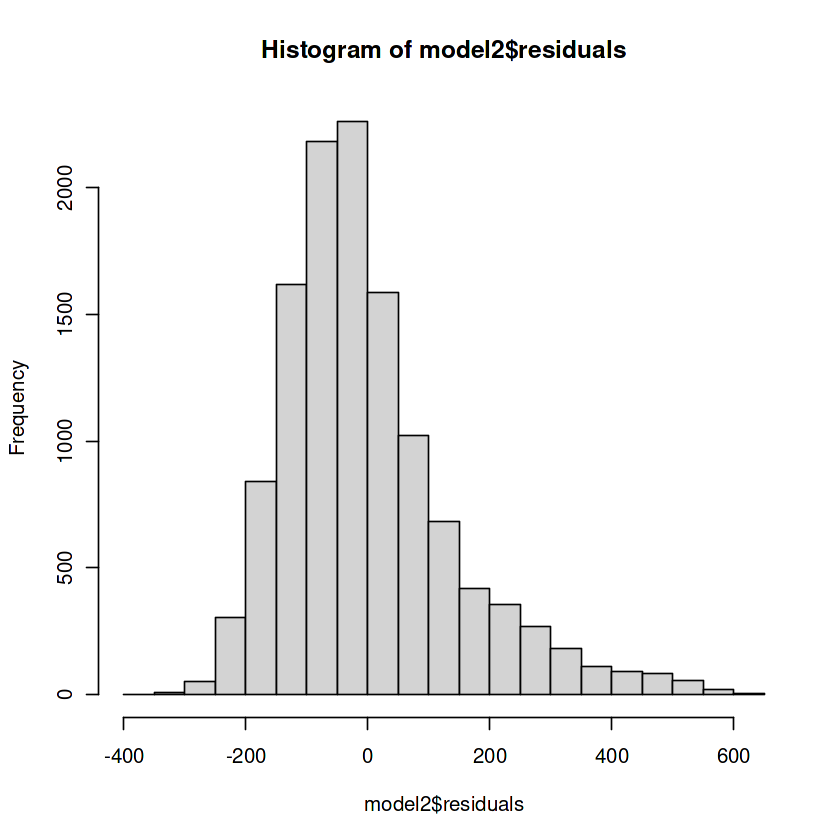


	studentized Breusch-Pagan test

data:  model2
BP = 1087.1, df = 11, p-value < 2.2e-16

[1] "H0 rejected: Error variance spreads INCONSTANTLY/generating\npatterns (Heteroscedasticity)"


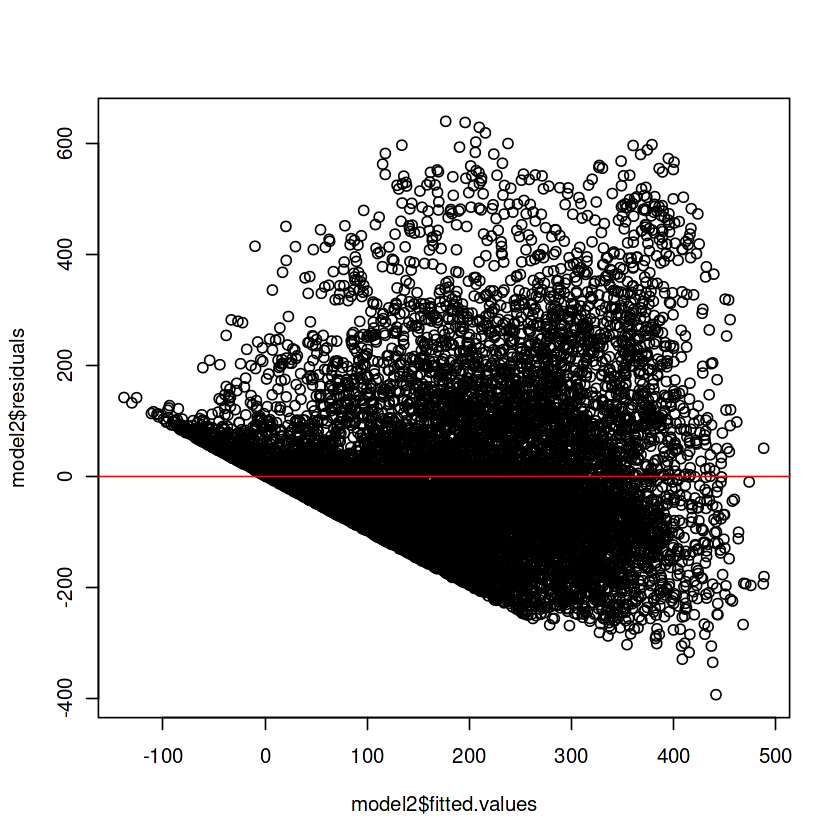

In [6]:
#Creating a linear regression model using my training dataset# ALSO REMOVED TEMP BECAUSE OF THE CC2 
model2 = lm(cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + atemp + hum + windspeed, data = train)
summary(model2)

summary(lm(cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + atemp + temp + hum + windspeed, data = train)) #For report Purposes

##These are some functions using the training data set, THIS IS CHECKING ASSUMPTIONS##
CheckNormal = function(model2){hist(model2$residuals, breaks = 30)
  shaptest = shapiro.test(model2$residuals[0:5000])
  print(shaptest)
  if(shaptest$p.value <= 0.05){
    print("H0 rejected: the residuals are NOT distributed normally")
  }else {
      print("H0 failed to reject: the residuals ARE distributed normally")
  }
}

CheckNormal(model = model2) #shapiro test needs to only include a value between 3-5000, graph is moderately right skewed
model1$residuals

CheckHomos <- function(model2){
  plot(model2$fitted.values, model2$residuals)
  abline(h = 0, col = "red")
  BP <- bptest(model2)
  print(BP)
  if (BP$p.value <= 0.05) {
    print("H0 rejected: Error variance spreads INCONSTANTLY/generating
patterns (Heteroscedasticity)")
  } else {
    print("H0 failed to reject: Error variance spreads CONSTANTLY
(Homoscedasticity)")
  }
}

CheckHomos(model = model2)

# chart.Correlation(train_numeric, histogram = TRUE) #it needed numeric variables only which is why I used train_numeric dataset

#Check Assumptions#
#Car package is not supported by R or Kaggle anymore. Githubinstall would not work successfully for install
#due to this problem vif function will not work but the below line of code would check for multicollinearity of the model
#vif(model2) #temp and atemp have very high values for this, to adjust i removed temp earlier

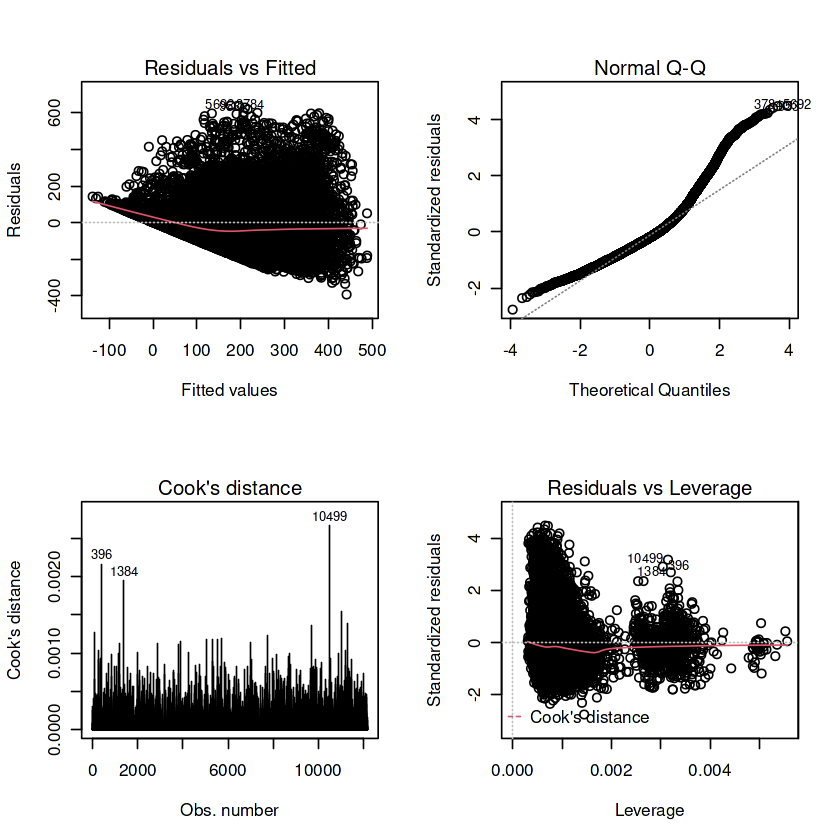

In [7]:
#Checking for outliers and removing them
par(mfrow = c(2, 2)) #Changing the panel layout to 2x2

lapply(c(1, 2, 4, 5), #showing 4 types of plots
       function(x) plot(model2,
                        which = x,
                        # labels.id = 1:nrow(train) 
                        cook.levels = c(0.05, 0.1))) %>% invisible() 

to.rm = c(10499, 396, 1384, 3784, 5692, 953) #To zoom in on the plot I inputted this straight into the console and used zoom button in plots on right.
train_rm_outlier = train[-to.rm, ]
train_factor = train_rm_outlier #Making this equal to the factored categorical variables with my outliers removed#
test = test %>%
  convert(fct(season, hr, holiday, weekday, workingday, weathersit)) #Have to apply this to test data as well to keep all transformations uniform

In [8]:
#TEST TEST TEST#
train_factor = train_rm_outlier %>%
  convert(fct(season, yr, mnth, hr, holiday, weekday, workingday, weathersit))

model_try = lm(cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + atemp + hum + windspeed, data = train_factor)
summary(model_try)
###ABOVE WAS A TEST TO FACTOR CATEGORICAL VARIABLES TO SEE IF IT IMPROVED WHIHC IT DID. I WILL NOW ADJUST THE REST OF MY CODE USING THAT DATA###


Call:
lm(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    workingday + weathersit + atemp + hum + windspeed, data = train_factor)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.17  -61.33   -7.91   52.20  432.15 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -79.746      7.915 -10.075  < 2e-16 ***
season2       41.899      5.772   7.260 4.12e-13 ***
season3       34.092      6.881   4.955 7.34e-07 ***
season4       69.531      5.847  11.892  < 2e-16 ***
yr1           85.885      1.866  46.026  < 2e-16 ***
mnth2          2.044      4.723   0.433 0.665228    
mnth3         13.821      5.257   2.629 0.008579 ** 
mnth4          3.385      7.796   0.434 0.664127    
mnth5         21.777      8.242   2.642 0.008246 ** 
mnth6          5.794      8.361   0.693 0.488340    
mnth7        -11.082      9.431  -1.175 0.240006    
mnth8         12.855      9.133   1.408 0.159281    
mnth9       

In [9]:
#We are now making another regression model with the training data after we removed the outliers

model3 = lm(cnt ~ season + yr + mnth + hr + holiday + weekday + weathersit + atemp + hum + windspeed, data = train_rm_outlier)
summary(model3)


Call:
lm(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    weathersit + atemp + hum + windspeed, data = train_rm_outlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-392.88  -93.94  -27.09   61.08  621.02 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -26.49902    8.07942  -3.280  0.00104 ** 
season        19.94649    2.18128   9.144  < 2e-16 ***
yr            80.05203    2.59186  30.886  < 2e-16 ***
mnth           0.03766    0.68059   0.055  0.95587    
hr             7.70474    0.19765  38.983  < 2e-16 ***
holiday      -21.96263    7.63793  -2.875  0.00404 ** 
weekday        1.79292    0.64636   2.774  0.00555 ** 
weathersit    -3.34003    2.27913  -1.465  0.14281    
atemp        320.40042    8.12336  39.442  < 2e-16 ***
hum         -197.42067    8.22847 -23.992  < 2e-16 ***
windspeed     43.75705   11.23796   3.894 9.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error


	Shapiro-Wilk normality test

data:  model3$residuals[0:5000]
W = 0.92843, p-value < 2.2e-16

[1] "H0 rejected: the residuals are NOT distributed normally"


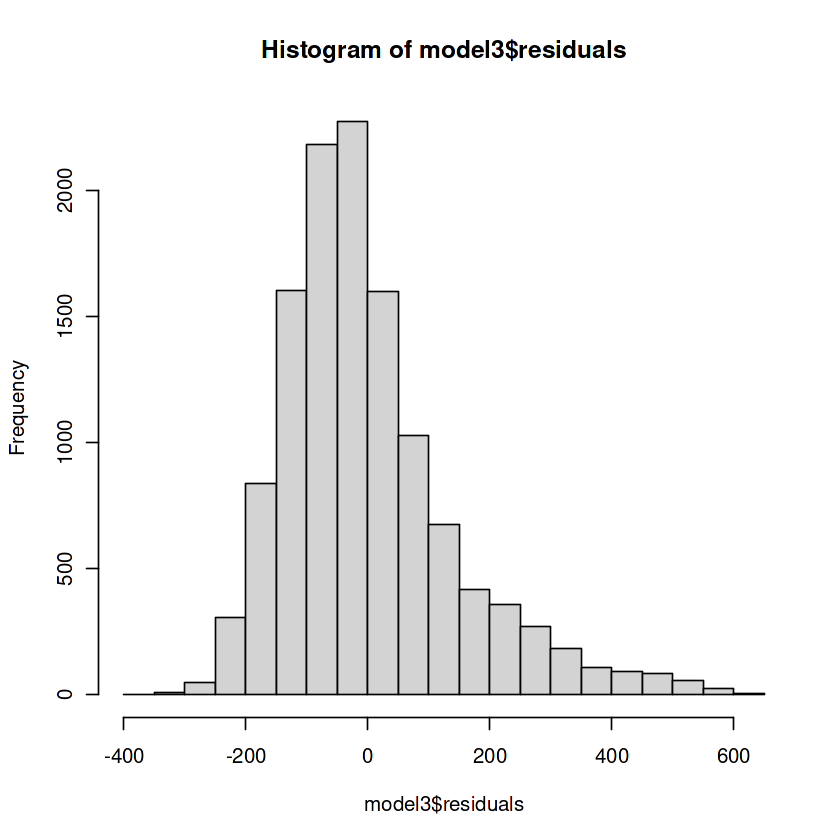


	studentized Breusch-Pagan test

data:  model3
BP = 1026.1, df = 10, p-value < 2.2e-16

[1] "H0 rejected: Error variance spreads INCONSTANTLY/generating\npatterns (Heteroscedasticity)"


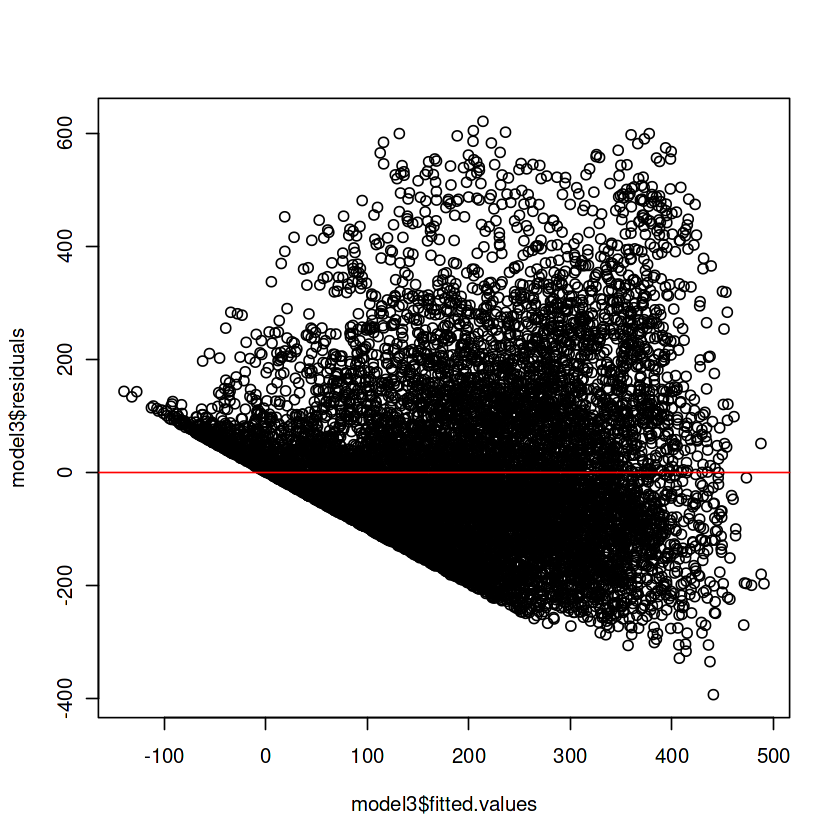

In [10]:
###THIS IS NOW GOING TO LOOK INTO WHETHER OR NOT MY NEW DATASET (WITH OUTLIERS REMOVED) IS A MORE ACCURATE MODEL###
assumption_check2 = function(model3){hist(model3$residuals, breaks = 30)
  shaptest = shapiro.test(model3$residuals[0:5000])
  print(shaptest)
  if(shaptest$p.value <= 0.05){
    print("H0 rejected: the residuals are NOT distributed normally")
  }else {
      print("H0 failed to reject: the residuals ARE distributed normally")
  }
}

assumption_check2(model = model3)

#Car package is not supported by R or Kaggle anymore. Githubinstall would not work successfully for install
#due to this problem vif function will not work but the below line of code would check for multicollinearity of the model
#vif(model3)

CheckHomos3 <- function(model3){
  plot(model3$fitted.values, model3$residuals)
  abline(h = 0, col = "red")
  BP <- bptest(model3)
  print(BP)
  if (BP$p.value <= 0.05) {
    print("H0 rejected: Error variance spreads INCONSTANTLY/generating
patterns (Heteroscedasticity)")
  } else {
    print("H0 failed to reject: Error variance spreads CONSTANTLY
(Homoscedasticity)")
  }
}

CheckHomos3(model3)

In [11]:
###RUNNING A CORRELATION TEST TO ASSIST IN DETERMINING WHICH VARIABLES TO ELIMINATE###
cor.test(train_rm_outlier$cnt, train_rm_outlier$mnth)
cor.test(train_rm_outlier$cnt, train_rm_outlier$temp)
cor.test(train_rm_outlier$atemp, train_rm_outlier$cnt)
cor.test(train_rm_outlier$yr, train_rm_outlier$cnt)
###I decided to eliminate month because season and month tend to overlap with each other, I eliminated temp because atemp is how people actually feel, eliminated yr and eliminated workday as well###


	Pearson's product-moment correlation

data:  train_rm_outlier$cnt and train_rm_outlier$mnth
t = 13.073, df = 12157, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1001743 0.1352314
sample estimates:
      cor 
0.1177395 



	Pearson's product-moment correlation

data:  train_rm_outlier$cnt and train_rm_outlier$temp
t = 49.223, df = 12157, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3927243 0.4223680
sample estimates:
      cor 
0.4076535 



	Pearson's product-moment correlation

data:  train_rm_outlier$atemp and train_rm_outlier$cnt
t = 48.562, df = 12157, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3880776 0.4178532
sample estimates:
      cor 
0.4030721 



	Pearson's product-moment correlation

data:  train_rm_outlier$yr and train_rm_outlier$cnt
t = 28.34, df = 12157, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2321892 0.2655367
sample estimates:
      cor 
0.2489367 



Call:
lm(formula = cnt ~ season + hr + holiday + weekday + weathersit + 
    atemp + hum + windspeed, data = train_rm_outlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-357.09  -96.21  -30.70   54.52  659.82 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.9895     8.2022   3.169  0.00154 ** 
season        19.6211     1.3047  15.038  < 2e-16 ***
hr             7.5054     0.2051  36.602  < 2e-16 ***
holiday      -21.1857     7.9234  -2.674  0.00751 ** 
weekday        1.5721     0.6710   2.343  0.01915 *  
weathersit    -1.2796     2.3655  -0.541  0.58854    
atemp        331.1075     8.3813  39.505  < 2e-16 ***
hum         -220.4728     8.4908 -25.966  < 2e-16 ***
windspeed     33.8917    11.6649   2.905  0.00367 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.6 on 12150 degrees of freedom
Multiple R-squared:  0.3388,	Adjusted R-squared:  0.3383 
F-statistic: 778.1 on 8 and 12150 DF, 


	Shapiro-Wilk normality test

data:  model4$residuals[0:5000]
W = 0.90576, p-value < 2.2e-16

[1] "H0 rejected: the residuals are NOT distributed normally"


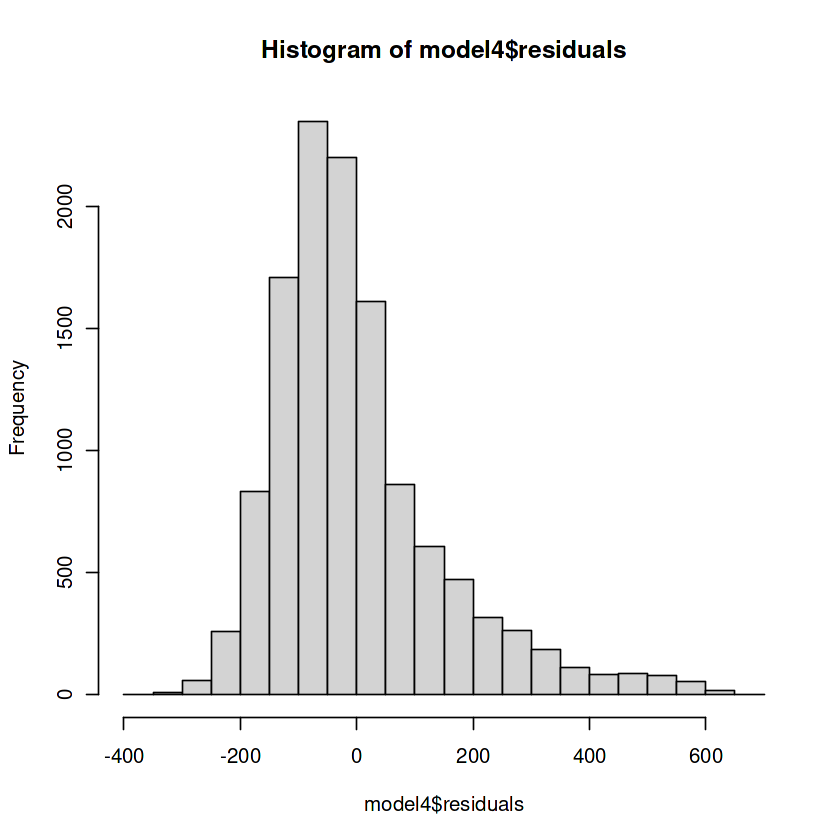


	studentized Breusch-Pagan test

data:  model4
BP = 490.86, df = 8, p-value < 2.2e-16

[1] "H0 rejected: Error variance spreads INCONSTANTLY/generating\npatterns (Heteroscedasticity)"


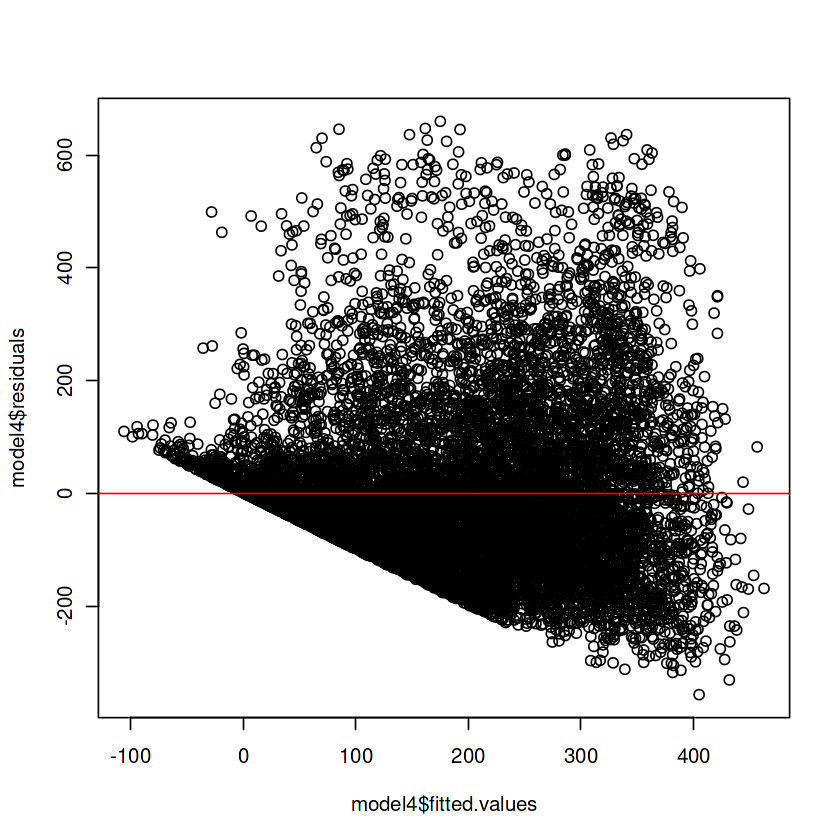

In [12]:
model4 = lm(cnt ~ season + hr + holiday + weekday + weathersit + atemp + hum + windspeed, data = train_rm_outlier)
summary(model4)

assumption_check3 = function(model4){hist(model4$residuals, breaks = 30)
  shaptest = shapiro.test(model4$residuals[0:5000])
  print(shaptest)
  if(shaptest$p.value <= 0.05){
    print("H0 rejected: the residuals are NOT distributed normally")
  }else {
      print("H0 failed to reject: the residuals ARE distributed normally")
  }
}

assumption_check3(model = model4)

#Car package is not supported by R or Kaggle anymore. Githubinstall would not work successfully for install
#due to this problem vif function will not work but the below line of code would check for multicollinearity of the model
#vif(model4)

CheckHomos4 <- function(model4){
  plot(model4$fitted.values, model4$residuals)
  abline(h = 0, col = "red")
  BP <- bptest(model4)
  print(BP)
  if (BP$p.value <= 0.05) {
    print("H0 rejected: Error variance spreads INCONSTANTLY/generating
patterns (Heteroscedasticity)")
  } else {
    print("H0 failed to reject: Error variance spreads CONSTANTLY
(Homoscedasticity)")
  }
}

CheckHomos4(model4)
####GOING TO STICK WITH USING MODEL 4 FOR THE END##

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


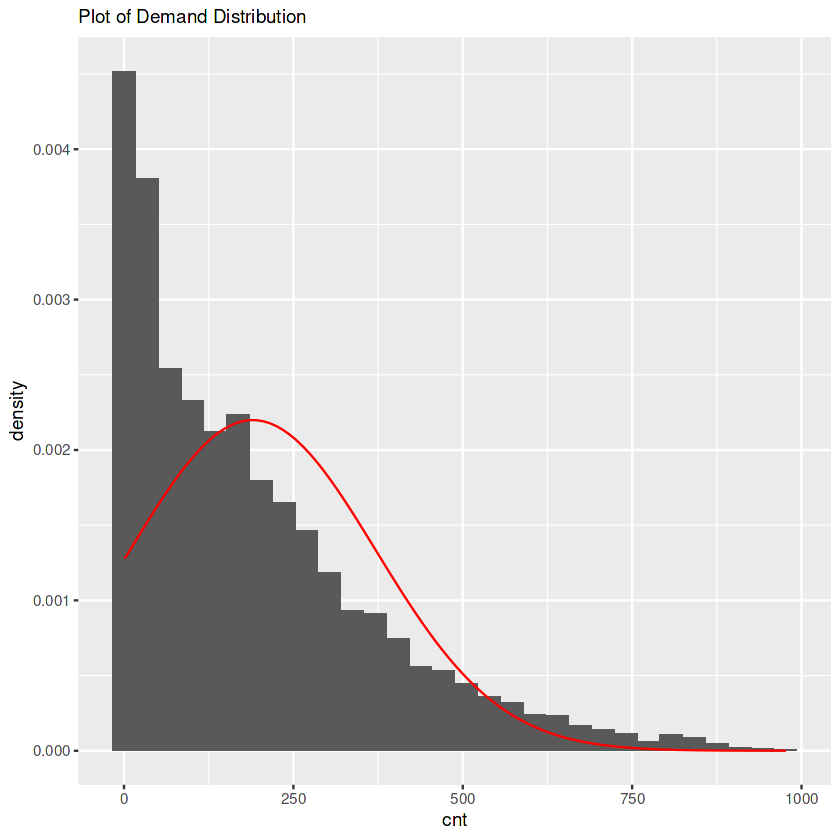

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


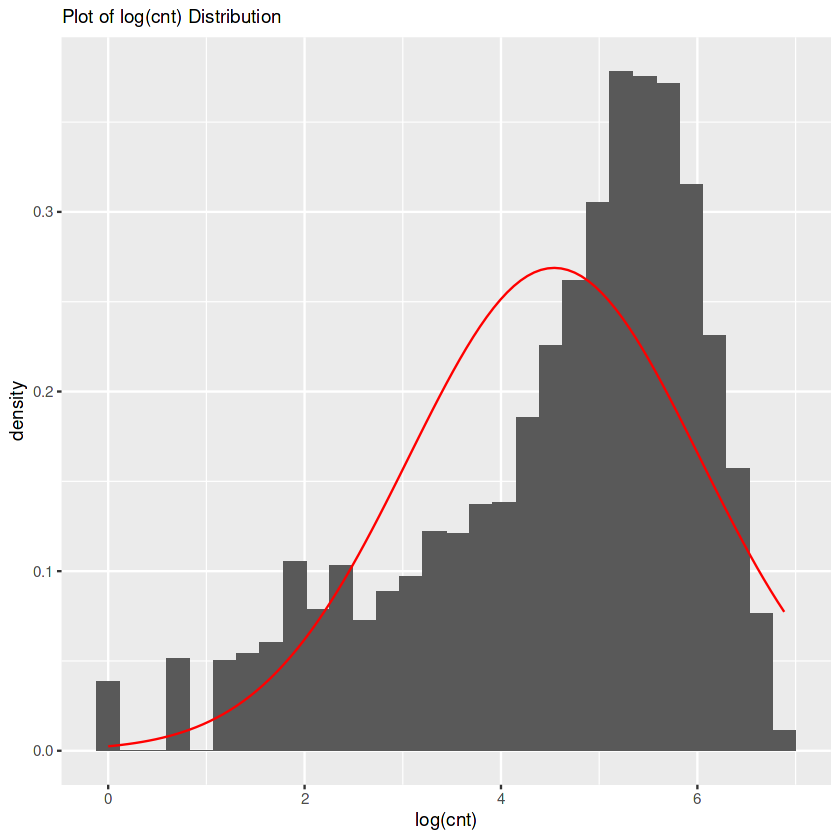

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 101 rows containing missing values (`geom_function()`).”


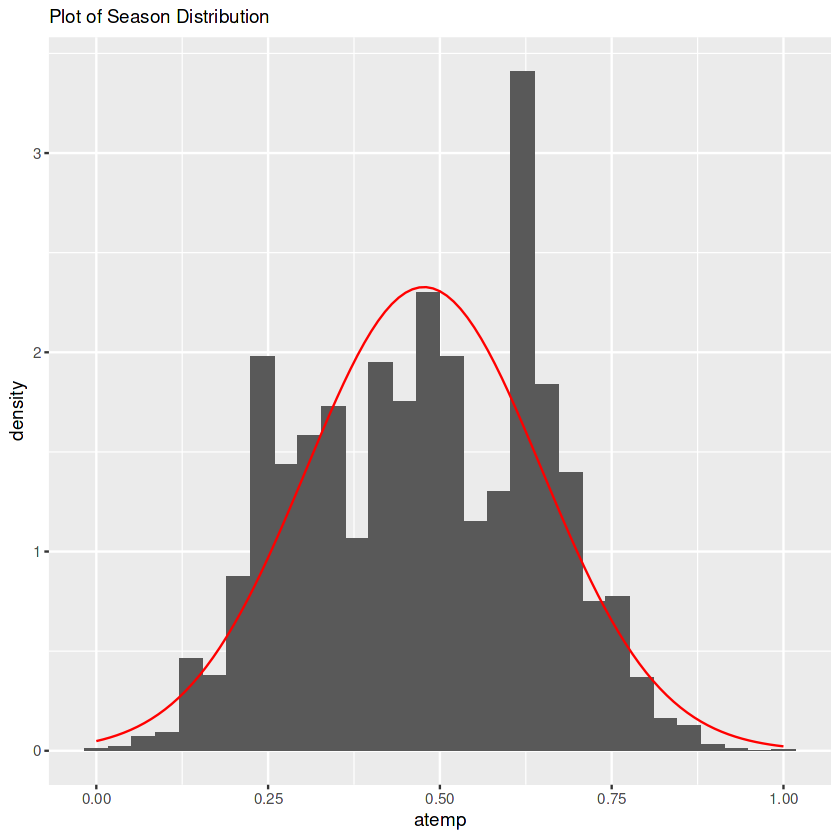

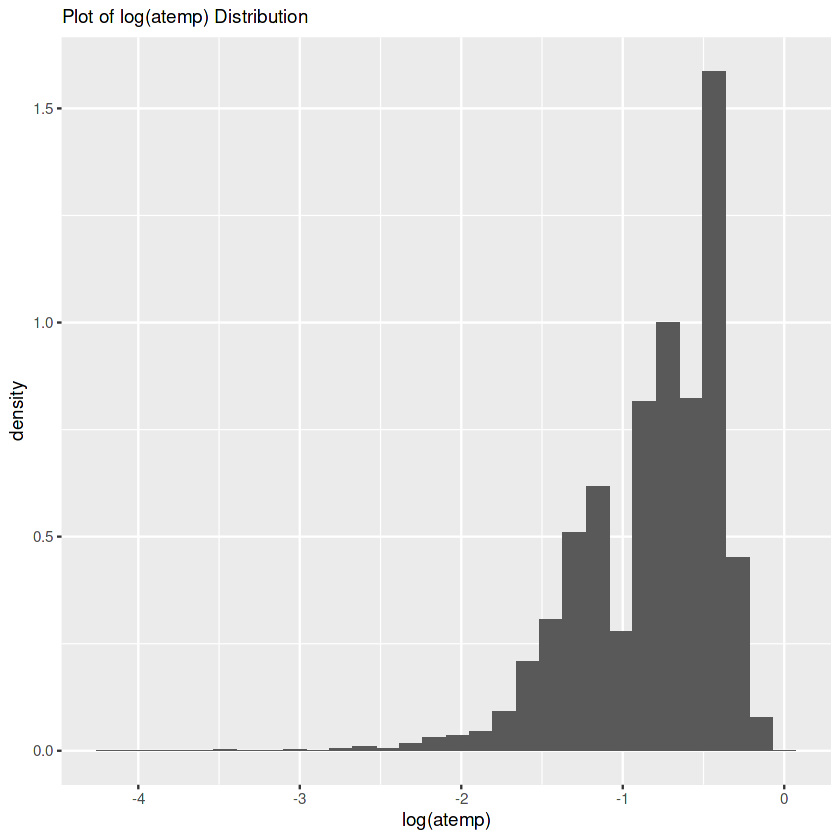

In [13]:
###PERFORMING A LOG TRANSFORMATION###

#LOG TRANSFORMATION OF Y#
#PLOT DEMAND VARIABLE#
ggplot(train_rm_outlier, aes(cnt)) + geom_histogram(aes(y =
..density..)) + stat_function(fun = dnorm, color = "red", args =
list(mean = mean(train_rm_outlier$cnt), sd = sd(train_rm_outlier$cnt))) +
ggtitle("Plot of Demand Distribution") + theme(plot.title =
element_text(size = 11))

#PLOT LOG OF DEMAND VARIABLE#
ggplot(train_rm_outlier, aes(log(cnt))) + geom_histogram(aes(y = ..density..)) + 
  stat_function(fun = dnorm, color = "red", args = list(mean = mean(log(train_rm_outlier$cnt)), sd = sd(log(train_rm_outlier$cnt)))) + 
  ggtitle("Plot of log(cnt) Distribution") + theme(plot.title = element_text(size = 11))

###GOING TO DO THE SAME FOR ATEMP BECAUSE THIS VARIABLE IS SIGNIFICANT FOR THE DATASET BECAUSE OF HIGH T-VALUE AND LOW P-VALUE IT GIVES MORE EVIDENCE AGAINST
#NULL HYPOTHESIS###

ggplot(train_rm_outlier, aes(atemp)) + geom_histogram(aes(y =
..density..)) + stat_function(fun = dnorm, color = "red", args =
list(mean = mean(train_rm_outlier$atemp), sd = sd(train_rm_outlier$atemp))) +
ggtitle("Plot of Season Distribution") + theme(plot.title =
element_text(size = 11))

ggplot(train_rm_outlier, aes(log(atemp))) + geom_histogram(aes(y = ..density..)) + 
  stat_function(fun = dnorm, color = "red", args = list(mean = mean(log(train_rm_outlier$atemp)), sd = sd(log(train_rm_outlier$atemp)))) + 
  ggtitle("Plot of log(atemp) Distribution") + theme(plot.title = element_text(size = 11))
#THE LOG GRAPH ABOVE MADE IT WORSE THAN NORMAL PLOT JUST ABOVE THIS CODE.


Call:
lm(formula = train_log$cnt ~ season + yr + hr + holiday + weekday + 
    weathersit + atemp + hum + windspeed, data = train_log)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0422 -0.6338  0.1135  0.7115  3.1088 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.408784   0.061026  39.471  < 2e-16 ***
season       0.163626   0.009491  17.240  < 2e-16 ***
yr           0.415095   0.019577  21.203  < 2e-16 ***
hr           0.101607   0.001492  68.088  < 2e-16 ***
holiday     -0.133883   0.057633  -2.323   0.0202 *  
weekday      0.019256   0.004881   3.945 8.02e-05 ***
weathersit   0.010884   0.017213   0.632   0.5272    
atemp        2.303355   0.061020  37.747  < 2e-16 ***
hum         -1.428319   0.062017 -23.031  < 2e-16 ***
windspeed    0.365357   0.084882   4.304 1.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.073 on 12149 degrees of freedom
Multiple R-squared:  0.4772,	Adjus


	Shapiro-Wilk normality test

data:  model5$residuals[0:5000]
W = 0.98824, p-value < 2.2e-16

[1] "H0 rejected: the residuals are NOT distributed normally"


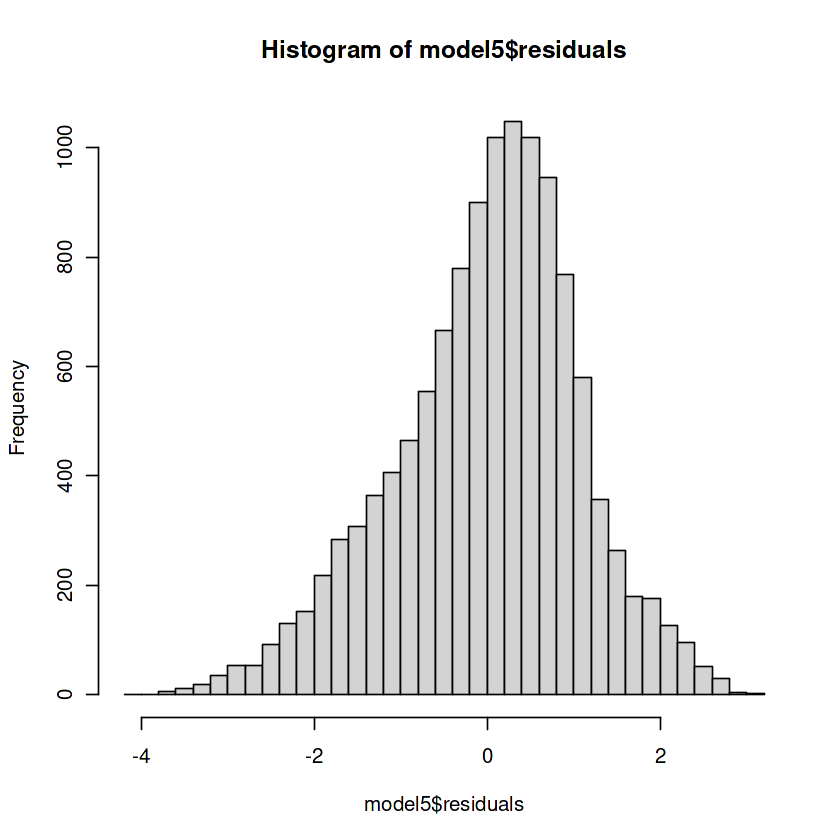


	studentized Breusch-Pagan test

data:  model5
BP = 1524.6, df = 9, p-value < 2.2e-16

[1] "H0 rejected: Error variance spreads INCONSTANTLY/generating\npatterns (Heteroscedasticity)"


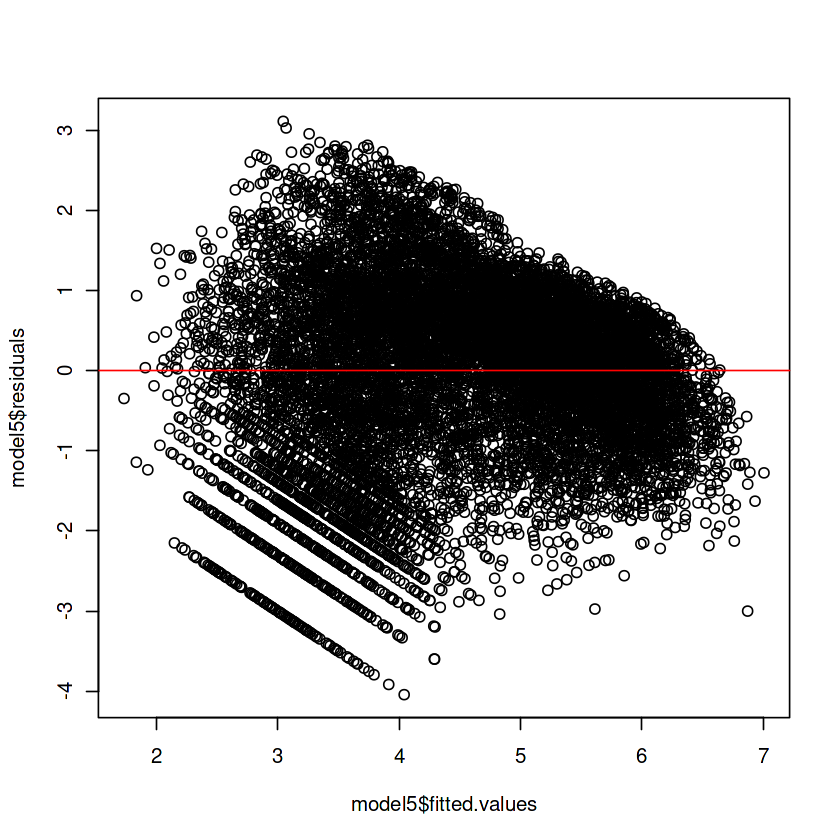

In [14]:
###GOING TO NOW RUN LOG MODEL USING TRAINING/TEST DATASETS###

train_log = train_rm_outlier
test_log = test

train_log$cnt = log(train_rm_outlier$cnt)
test_log$cnt = log(test$cnt)

model5 = lm(train_log$cnt ~ season + yr + hr + holiday + weekday + weathersit + atemp + hum + windspeed, data = train_log)
summary(model5)
#MODEL 5 SHOWED AN INCREASED IN R2 AND ADJUSTED R2 TO WITHIN ACCEPTED LEVELS AT 0.8233 AND RESIDUAL STANDARD ERROR HAS DECREASED#

assumption_check4 = function(model5){hist(model5$residuals, breaks = 30)
  shaptest = shapiro.test(model5$residuals[0:5000])
  print(shaptest)
  if(shaptest$p.value <= 0.05){
    print("H0 rejected: the residuals are NOT distributed normally")
  }else {
      print("H0 failed to reject: the residuals ARE distributed normally")
  }
}

assumption_check4(model = model5) #Distribution got better but now it is slightly left skewed.

#Car package is not supported by R or Kaggle anymore. Githubinstall would not work successfully for install
#due to this problem vif function will not work but the below line of code would check for multicollinearity of the model
#vif(model5)

CheckHomos5 <- function(model5){
  plot(model5$fitted.values, model5$residuals)
  abline(h = 0, col = "red")
  BP <- bptest(model5)
  print(BP)
  if (BP$p.value <= 0.05) {
    print("H0 rejected: Error variance spreads INCONSTANTLY/generating
patterns (Heteroscedasticity)")
  } else {
    print("H0 failed to reject: Error variance spreads CONSTANTLY
(Homoscedasticity)")
  }
}

CheckHomos5(model5)

Box-Cox Transformation

12159 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    40.0   144.0   190.1   282.0   977.0 

Largest/Smallest: 977 
Sample Skewness: 1.26 

Estimated Lambda: 0.3 



instant dteday     season yr mnth hr holiday weekday workingday weathersit
1  2986   2011-05-09 2      0   5    7 0       1       1          1         
2  1842   2011-03-22 2      0   3   11 0       2       1          1         
3  3371   2011-05-25 2      0   5    8 0       3       1          1         
4 11638   2012-05-05 2      1   5    2 0       6       0          1         
5  4761   2011-07-22 3      0   7    6 0       5       1          1         
6  6746   2011-10-13 4      0  10   15 0       4       1          1         
  temp atemp  hum  windspeed casual registered cnt cnt_new  
1 0.48 0.4697 0.63 0.2537    16     221        237 13.857750
2 0.44 0.4394 0.51 0.3284    22      64         86  9.349850
3 0.64 0.6061 0.69 0.2239    36     495        531 18.564800
4 0.58 0.5455 0.88 0.0000    24      51         75  8.839653
5 0.76 0.7424 0.75 0.0896    13      83         96  9.775381
6 0.66 0.6061 0.78 0.1940    27     128        155 11.801521


Call:
lm(formula = cnt ~ season + hr + holiday + weekday + weathersit + 
    atemp + hum + windspeed, data = train_rm_outlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-357.09  -96.21  -30.70   54.52  659.82 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.9895     8.2022   3.169  0.00154 ** 
season        19.6211     1.3047  15.038  < 2e-16 ***
hr             7.5054     0.2051  36.602  < 2e-16 ***
holiday      -21.1857     7.9234  -2.674  0.00751 ** 
weekday        1.5721     0.6710   2.343  0.01915 *  
weathersit    -1.2796     2.3655  -0.541  0.58854    
atemp        331.1075     8.3813  39.505  < 2e-16 ***
hum         -220.4728     8.4908 -25.966  < 2e-16 ***
windspeed     33.8917    11.6649   2.905  0.00367 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.6 on 12150 degrees of freedom
Multiple R-squared:  0.3388,	Adjusted R-squared:  0.3383 
F-statistic: 778.1 on 8 and 12150 DF, 


	Shapiro-Wilk normality test

data:  model6$residuals[0:5000]
W = 0.90576, p-value < 2.2e-16

[1] "H0 rejected: the residuals are NOT distributed normally"


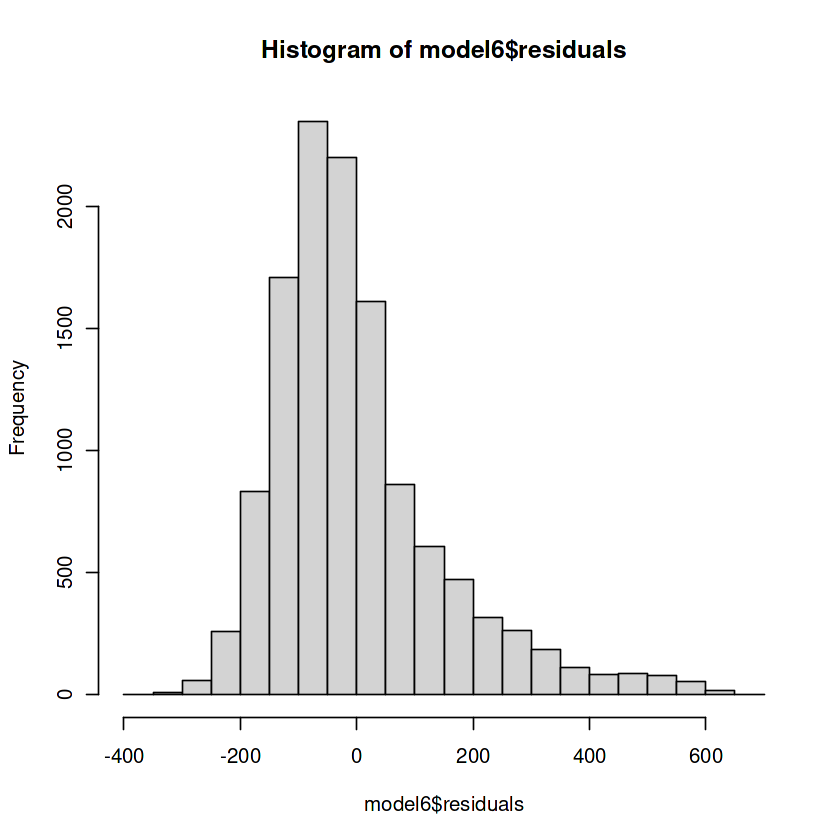


	studentized Breusch-Pagan test

data:  model6
BP = 490.86, df = 8, p-value < 2.2e-16

[1] "H0 rejected: Error variance spreads INCONSTANTLY/generating\npatterns (Heteroscedasticity)"


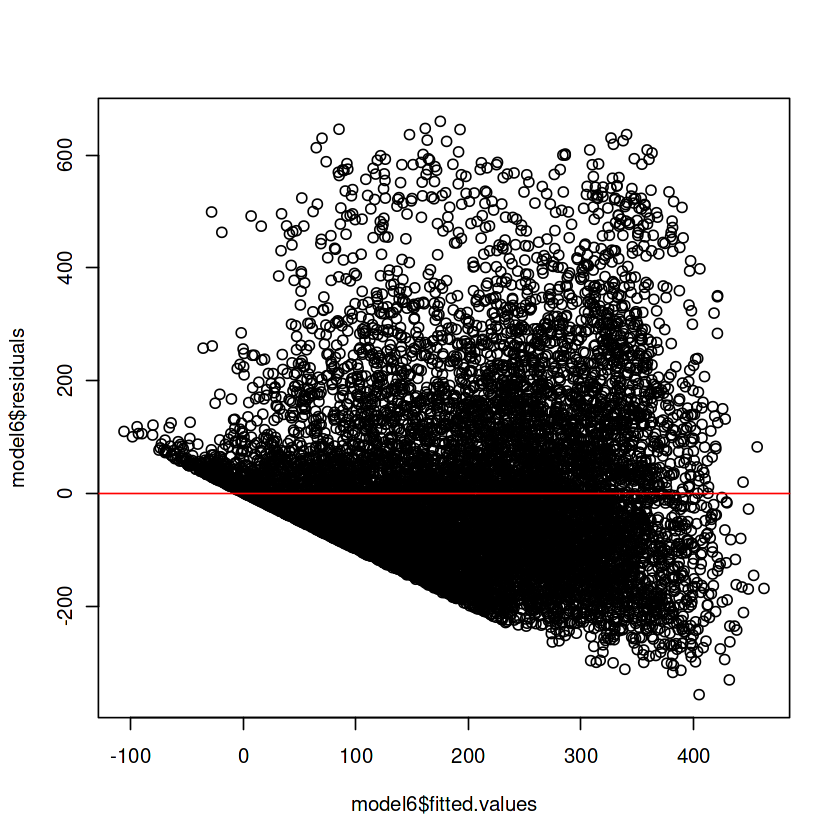

In [15]:
###NOW GOING TO RUN A BOX-COX TRANSFORMATION SEEMING DATA IS STILL NOT NORMALLY DISTRIBUTED###

cnt_bc = BoxCoxTrans(train_rm_outlier$cnt)
print(cnt_bc)
train_rm_outlier <- cbind(train_rm_outlier, cnt_new = predict(cnt_bc, train_rm_outlier$cnt))
head(train_rm_outlier)

model6 = lm(cnt ~ season + hr + holiday + weekday + weathersit + atemp + hum + windspeed, data = train_rm_outlier)
summary(model6)

assumption_check5 = function(model6){hist(model6$residuals, breaks = 30)
  shaptest = shapiro.test(model6$residuals[0:5000])
  print(shaptest)
  if(shaptest$p.value <= 0.05){
    print("H0 rejected: the residuals are NOT distributed normally")
  }else {
      print("H0 failed to reject: the residuals ARE distributed normally")
  }
}
assumption_check5(model = model6)

#Car package is not supported by R or Kaggle anymore. Githubinstall would not work successfully for install
#due to this problem vif function will not work but the below line of code would check for multicollinearity of the model
#vif(model6)

CheckHomos6 <- function(model6){
  plot(model6$fitted.values, model6$residuals)
  abline(h = 0, col = "red")
  BP <- bptest(model6)
  print(BP)
  if (BP$p.value <= 0.05) {
    print("H0 rejected: Error variance spreads INCONSTANTLY/generating
patterns (Heteroscedasticity)")
  } else {
    print("H0 failed to reject: Error variance spreads CONSTANTLY
(Homoscedasticity)")
  }
}

CheckHomos6(model6)

BCTransform <- function(y, lambda=0.33) {
if (lambda == 3L) { log(y) }
else { (y^lambda - 1) / lambda }
}


Call:
lm(formula = cnt ~ season + hr + holiday + weekday + weathersit + 
    atemp + hum + windspeed, data = train_rm_outlier, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.0272 -0.9208 -0.3430  0.5065  9.6547 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.8679     6.7503   3.980 6.92e-05 ***
season        12.8462     1.0938  11.745  < 2e-16 ***
hr             8.3934     0.1841  45.600  < 2e-16 ***
holiday      -23.7630     6.2683  -3.791 0.000151 ***
weekday        1.1505     0.5733   2.007 0.044807 *  
weathersit    -0.8721     1.9272  -0.453 0.650892    
atemp        274.0210     7.7108  35.537  < 2e-16 ***
hum         -162.5329     7.6563 -21.229  < 2e-16 ***
windspeed     10.2285    10.2771   0.995 0.319623    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.339 on 12150 degrees of freedom
Multiple R-squared:  0.3573,	Adjusted R-squared:  0.3569 
F-statisti


	studentized Breusch-Pagan test

data:  model4_weighted
BP = 0.17951, df = 8, p-value = 1

[1] "H0 failed to reject: Error variance spreads CONSTANTLY\n(Homoscedasticity)"


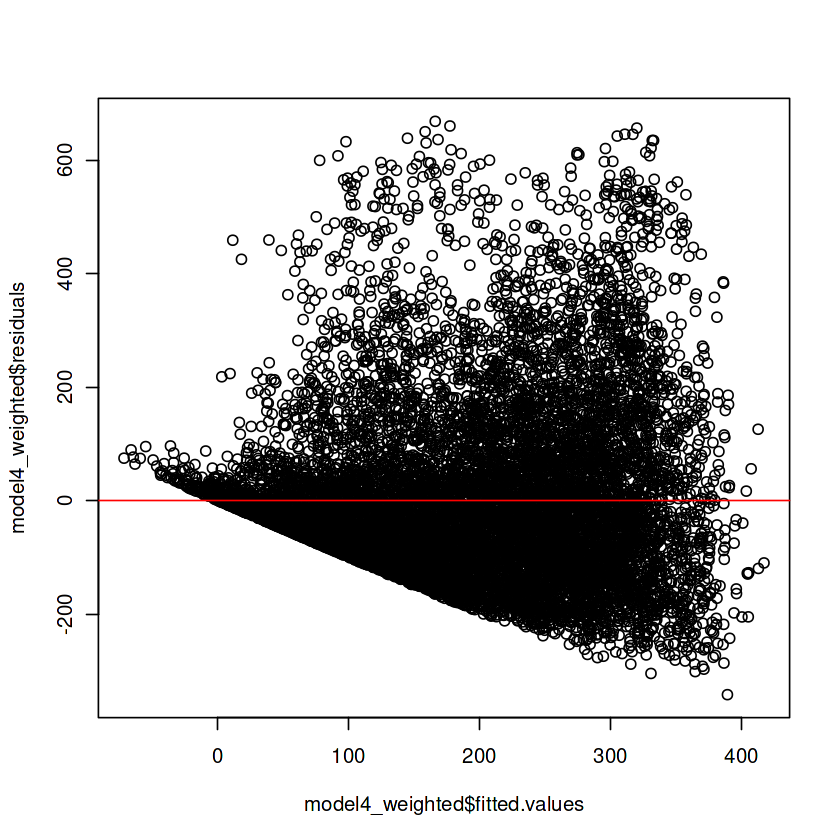


	Shapiro-Wilk normality test

data:  model4_weighted$residuals[0:5000]
W = 0.89344, p-value < 2.2e-16

[1] "H0 rejected: the residuals are NOT distributed normally"


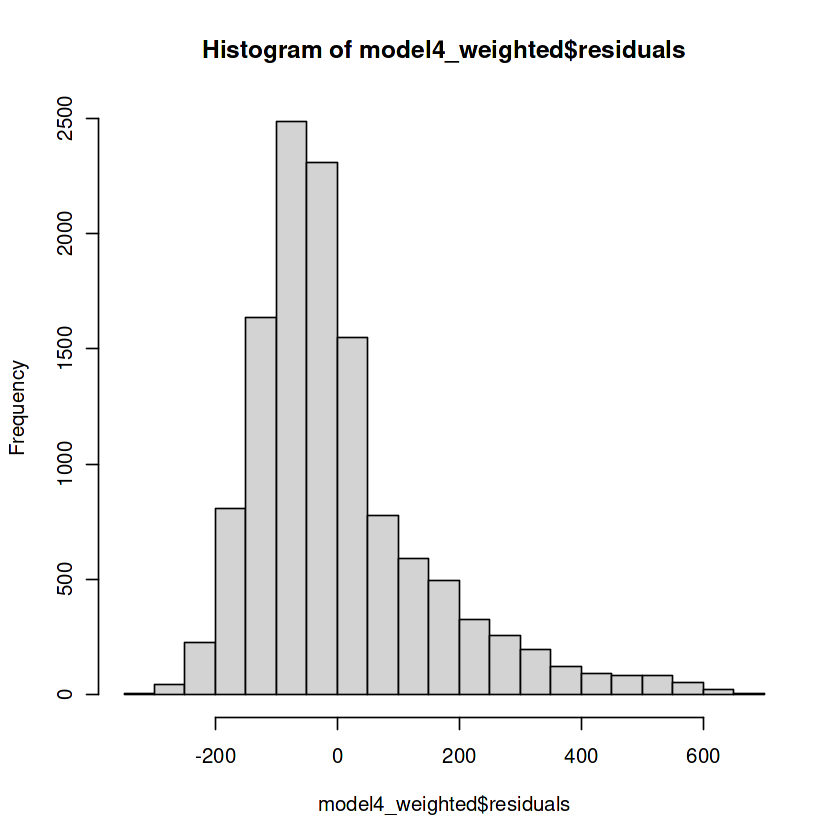

In [16]:
###HAIL MARY ATTEMPT TO ELIMINATE HETEROSCEDSTICITY IS TO USE WEIGHTED LEAST SQUARES###

weights = 1/lm(abs(model4$residuals) ~ model4$fitted.values)$fitted.values^2

model4_weighted = lm(cnt ~ season + hr + holiday + weekday + weathersit + atemp + hum + windspeed, weights = weights, data = train_rm_outlier)
summary(model4_weighted) #Using model4 because thats the most pure model before we started doing log stuff and box cox stuff

CheckHomos7 <- function(model4_weighted){
  plot(model4_weighted$fitted.values, model4_weighted$residuals)
  abline(h = 0, col = "red")
  BP <- bptest(model4_weighted)
  print(BP)
  if (BP$p.value <= 0.05) {
    print("H0 rejected: Error variance spreads INCONSTANTLY/generating
patterns (Heteroscedasticity)")
  } else {
    print("H0 failed to reject: Error variance spreads CONSTANTLY
(Homoscedasticity)")
  }
}

CheckHomos7(model = model4_weighted) ###THERE WAS NO HOMOSCEDSTICITY FOR THIS ONE###

assumption_check_weighted = function(model4_weighted){hist(model4_weighted$residuals, breaks = 30)
  shaptest = shapiro.test(model4_weighted$residuals[0:5000])
  print(shaptest)
  if(shaptest$p.value <= 0.05){
    print("H0 rejected: the residuals are NOT distributed normally")
  }else {
      print("H0 failed to reject: the residuals ARE distributed normally")
  }
}

assumption_check_weighted(model4_weighted)

In [17]:
###ROBUST STANDARD ERRORS###

coeftest(model4, vcovHC(model4, "HC1")) #This does not change the estimates it only changes the standard errors
coefci(model4, vcov. = vcovHC(model4, type = "HC1"))


t test of coefficients:

              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)   25.98951    7.11655   3.6520 0.0002613 ***
season        19.62111    1.26443  15.5178 < 2.2e-16 ***
hr             7.50538    0.17877  41.9834 < 2.2e-16 ***
holiday      -21.18572    6.03765  -3.5089 0.0004515 ***
weekday        1.57215    0.62076   2.5326 0.0113338 *  
weathersit    -1.27964    2.24021  -0.5712 0.5678659    
atemp        331.10755    8.32389  39.7780 < 2.2e-16 ***
hum         -220.47278    8.41121 -26.2118 < 2.2e-16 ***
windspeed     33.89173   11.27133   3.0069 0.0026447 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


2.5 %        97.5 %     
(Intercept)   12.0399373   39.939090
season        17.1426275   22.099592
hr             7.1549597    7.855796
holiday      -33.0204722   -9.350960
weekday        0.3553615    2.788936
weathersit    -5.6708168    3.111538
atemp        314.7913969  347.423698
hum         -236.9600889 -203.985461
windspeed     11.7981380   55.985324

In [18]:
###WE ARE NOW GOING TO RUN PREDICTIONS###

metrics <- function(y_pred, y_true){
mse = mse(y_pred, y_true)
rmse = RMSE(y_pred, y_true)
mae = MAE(y_pred, y_true)
print(paste0("MSE: ", round(mse, 6)))
print(paste0("RMSE: ", round(rmse, 6)))
print(paste0("MAE: ", round(mae, 6)))
corPredAct <- cor(y_pred, y_true)
print(paste0("Correlation: ", round(corPredAct, 6)))
print(paste0("R^2 between y_pred & y_true: ", round(corPredAct^2, 6)))
}

cat("Performance using train dataset:\n")
## Performance using train dataset:
metrics(y_pred = model4_weighted$fitted.values, y_true = train_rm_outlier$cnt)

#NOW WE ARE USING TEST DATA#
predicted = predict(model4_weighted, newdata = test_numeric)
cat("\nPerformances using test dataset:\n")
## Performance using test dataset:
metrics(y_pred = predicted, y_true = test_numeric$cnt)

Performance using train dataset:
[1] "MSE: 22075.893417"
[1] "RMSE: 148.579586"
[1] "MAE: 108.406763"
[1] "Correlation: 0.576299"
[1] "R^2 between y_pred & y_true: 0.33212"

Performances using test dataset:
[1] "MSE: 21676.355159"
[1] "RMSE: 147.228921"
[1] "MAE: 107.195121"
[1] "Correlation: 0.581485"
[1] "R^2 between y_pred & y_true: 0.338125"
